import libraries

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

EDA

check dataset

In [39]:
df = pd.read_csv('simulated_judi_dataset.csv')
df.head()

,amount,transaction_type,merchant_category,location,device_used,is_fraud,time_since_last_transaction,velocity_score,geo_anomaly_score,keyword_match
0,374719,transfer,shopping,Jakarta,Linux,0,425,0.72,0.46,1
1,465188,purchase,entertainment,Jakarta,iOS,0,157,0.57,0.28,0
2,427211,purchase,others,Medan,Android,0,271,0.30,0.45,1
3,478227,transfer,shopping,Surabaya,Windows,0,8,0.40,0.57,0
4,348332,purchase,others,Surabaya,Windows,0,288,0.72,0.28,1


In [40]:
df["is_fraud"].value_counts()

is_fraud
0    6127
1    3873
Name: count, dtype: int64

pairplot

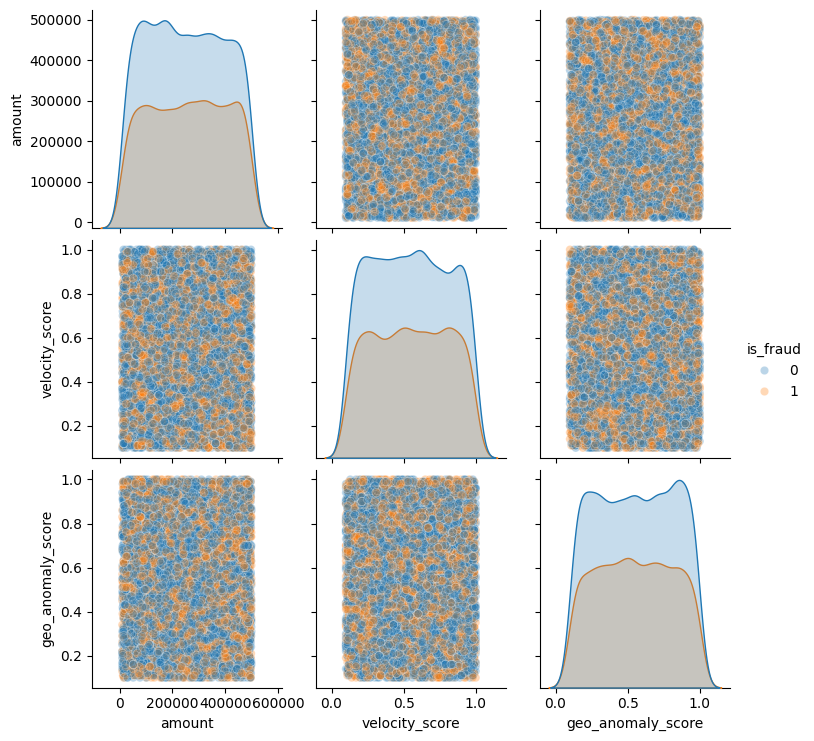

In [41]:
sns.pairplot(df[['amount', 'velocity_score', 'geo_anomaly_score', 'is_fraud']], hue="is_fraud", plot_kws={"alpha": 0.3})
plt.show()

correlation matrix

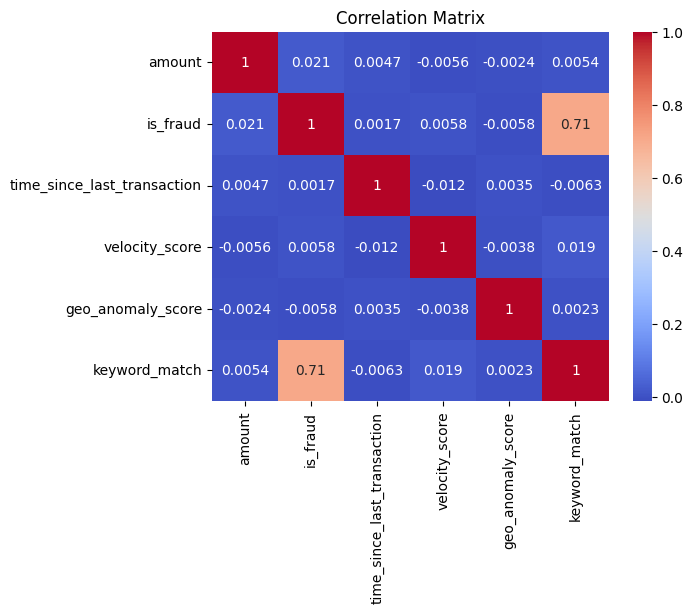

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [43]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['transaction_type', 'merchant_category', 'location', 'device_used']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [44]:
df['velocity_bucket'] = pd.cut(df['velocity_score'], bins=[0, 0.3, 0.7, 1.0], labels=[0,1,2])
df['high_amount'] = (df['amount'] > 300000).astype(int)
df['amount_per_time_gap'] = df['amount'] / (df['time_since_last_transaction'] + 1)

In [45]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['amount', 'time_since_last_transaction', 'velocity_score', 'geo_anomaly_score']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [46]:
from sklearn.model_selection import train_test_split

X = df.drop(['is_fraud', 'keyword_match'], axis=1)

y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

for name, model in models.items():
    print(f"====== {name} ======")
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
        if y_prob is not None:
            roc_score = roc_auc_score(y_test, y_prob)
            print(f"ROC AUC Score: {roc_score:.4f}")
        print("\n")
    except Exception as e:
        print(f"Error evaluating {name}: {e}\n")



====== Logistic Regression ======


c:\Users\hg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[1466  372]
 [ 709  453]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73      1838
           1       0.55      0.39      0.46      1162

    accuracy                           0.64      3000
   macro avg       0.61      0.59      0.59      3000
weighted avg       0.63      0.64      0.62      3000

ROC AUC Score: 0.6678


====== Random Forest ======
Confusion Matrix:
[[1385  453]
 [ 531  631]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      1838
           1       0.58      0.54      0.56      1162

    accuracy                           0.67      3000
   macro avg       0.65      0.65      0.65      3000
weighted avg       0.67      0.67      0.67      3000

ROC AUC Score: 0.6921


====== Gradient Boosting ======
Confusion Matrix:
[[1293  545]
 [ 394  768]]

Classification Report:
              precision    reca

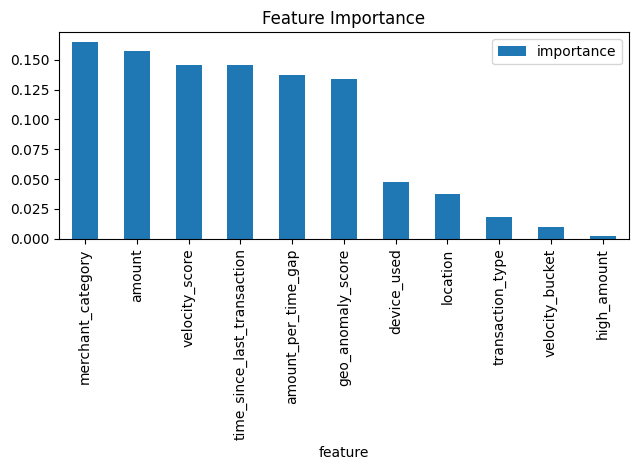

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns
fi_df = pd.DataFrame({"feature": features, "importance": importances}).sort_values(by="importance", ascending=False)

fi_df.plot.bar(x='feature', y='importance', title='Feature Importance')
plt.tight_layout()
plt.show()
